# By Maduako Akachi

# Introduction
## Dataset Description
In this project, I will be analyzing a dataset containing information about movies from Data Science Lovers on Youtube. The dataset can be found here (https://drive.google.com/file/d/1p630pDcSkbQp_WXig8PeEVevZtSo4GQK/view)

## Question(s) for Analysis

1. For 'House of Cards', what is the Show Id and Who is the Director of this show ?
2. In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
3. How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
4. Show all the Movies that were released in year 2000.
5. Show only the Titles of all TV Shows that were released in India only.
6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
8. In how many movies/shows, Tom Cruise was cast ?
9. What are the different Ratings defined by Netflix ?
10. How many Movies got the 'TV-14' rating, in Canada ?
11. How many TV Shows got the 'R' rating, after year 2018 ?
12. What is the maximum duration of a Movie/Show on Netflix ?
13. Which individual country has the Highest No. of TV Shows ?
14. How can we sort the dataset by Year ?

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load and read the dataset into panda dataframe
#Read statistics
Netflix_df = pd.read_csv('../input/netflex-analysis/Netflix.csv')
Netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
#Get more information about the dataset
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [4]:
#Check for missing values
Netflix_df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

From the information gathered from the cells above, there are a total of 7789 rows and 11 columns in this dataframe.

There are missing values for the Director, Cast, Country, Release_Date and Rating columns. Since they are all objects, filling it up with mean. The missing values can be replaced with the mode, but becasue of the nature of the dataset, it will be better to remove the missing values completely.

This will be done during our data cleaning.

In [5]:
#Make a copy of the dataframe specifically for dropping the null values
NoNullNetflix_df=Netflix_df.copy()

In [6]:
#Drop null values
NoNullNetflix_df.dropna(inplace=True)

In [7]:
#Check again for missing values
NoNullNetflix_df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [8]:
display(NoNullNetflix_df.head())
display(Netflix_df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
#Check for sum of duplicate values
sum(Netflix_df.duplicated())

2

In [10]:
#Check for actual duplicate values
Netflix_df[(Netflix_df.duplicated())]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [11]:
#Drop duplicate
Netflix_df.drop_duplicates(inplace=True)

In [12]:
#Check for duplicate values
sum(Netflix_df.duplicated())

0

In [13]:
#Change ReleaseDate format to Datetime
Netflix_df['Release_Date'] = pd.to_datetime(Netflix_df['Release_Date'])

# Q1: what is the show ID and the director of House Of Cards

In [14]:
#find value or string in df
Netflix_df[Netflix_df['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2018-11-02,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


# Q2: In what year was the highest number of movies and tv shows released?

In [15]:
#Value count of Release_Date column
Netflix_df['Release_Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Release_Date, dtype: int64

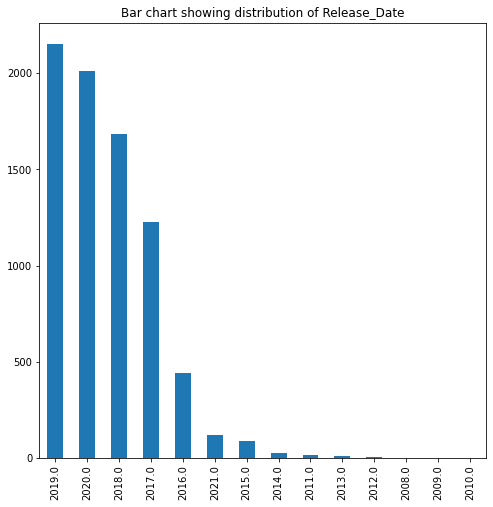

In [16]:
#Bar chart showing distribution of Release_Date
Netflix_df['Release_Date'].dt.year.value_counts().plot(kind='bar', figsize= (8,8));
plt.title('Bar chart showing distribution of Release_Date');

# Q3: How many movies and tv shows are in the dataset? use bar graph

In [17]:
#Value count of Category column
Netflix_df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

In [18]:
#Value count of Category column (2nd method)
Netflix_df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

# Q4: Show all movies that were released in 2000

In [19]:
#Create new column containing only year
Netflix_df['Year'] = Netflix_df['Release_Date'].dt.year

In [20]:
Netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [21]:
#two conditions must be met
Netflix_df[ (Netflix_df['Category']=='Movie') & (Netflix_df['Year']==2000) ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


# Q5: Show titles of all tv shows released in India

In [22]:
#three conditions must be met
Netflix_df[ (Netflix_df['Category']=='TV Show') & (Netflix_df['Country']=='India') ] ['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

# Q6: show top 10 directors with highest number of tv shows and movies

In [23]:
#Value count of Director column showing the top 10 values
Netflix_df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

# Q7: Show all records where category is movie and type is comedies or country is united kingdom

and & or operators will be used here

In [24]:
#3 conditions must be met
Netflix_df[ (Netflix_df['Category']=='Movie') & (Netflix_df['Type']=='Comedies') | (Netflix_df['Country']=='United Kingdom') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017.0


# Q8: How many movies did Tom Cruise appear in?

In [25]:
#show boolean value for cast column
Netflix_df['Cast']=='Tom Cruise'

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Name: Cast, Length: 7787, dtype: bool

In [26]:
Netflix_df[Netflix_df['Cast']=='Tom Cruise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


In [27]:
#find value or string in df
Netflix_df[Netflix_df['Cast'].isin(['Tom Cruise'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


The above methods don't work, the .str method will have to be used but it won't work unless all null values are dropped. This is where the second dataframe will be used because it does not contain any null values.

In [28]:
#use NoNullNetflix_df dataframe for this because of the .str
#use string to find cast
NoNullNetflix_df[NoNullNetflix_df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


# Q9: What are the different ratings defined by netflix?

In [29]:
#Get unique values
Netflix_df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# Q10: How many movies got the TV-14 rating in Canada?

In [30]:
#two conditions must be met
#3 conditions must be met
Netflix_df[ (Netflix_df['Category']=='Movie') & (Netflix_df['Rating']=='TV-14') & (Netflix_df['Country']=='Canada')].shape

(11, 12)

# Q11: How many tv shows got the R rating after year 2018?

In [31]:
#two conditions must be met
Netflix_df[ (Netflix_df['Category']=='TV Show') & (Netflix_df['Year']>2018) & (Netflix_df['Rating']=='R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0


# Q12: What is the maximum duration of a Movie/Show on Netflix?

In [32]:
#Create two new columns 
Netflix_df[['Minutes', 'Unit']] = Netflix_df['Duration'].str.split(' ', expand = True)

In [33]:
#Confirm the creation of the new columns
Netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min


In [34]:
#use max method to find maximum values
Netflix_df['Minutes'].max()

'99'

# Q13: Which individual country has the highest number of tv shows

In [35]:
tv_df=Netflix_df[Netflix_df['Category']=='TV Show']

In [36]:
tv_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,1,Season
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,1,Season
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0,1,Season
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0,1,Season


In [37]:
#get value count of Country 
tv_df.Country.value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

# Q14: How can we sort the dataset by year?

In [38]:
#main method. By default, it starts from the earliest year
Netflix_df.sort_values(by = 'Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,13,Seasons


In [39]:
Netflix_df.sort_values(by = 'Year', ascending =False).head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2021-01-01,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,2021-01-01,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021.0,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,2021-01-15,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021.0,1,Season
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,2021-01-10,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021.0,162,min
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,2021-01-12,TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021.0,81,min
560,s561,Movie,Apaharan,Prakash Jha,"Ajay Devgn, Nana Patekar, Bipasha Basu, Ayub K...",India,2021-01-08,TV-14,161 min,"Dramas, International Movies",Raised under the condescending eye of his acti...,2021.0,161,min
1355,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,NaN,2021-01-12,TV-MA,98 min,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri...",2021.0,98,min
5922,s5922,TV Show,Surviving Death,NaN,NaN,United States,2021-01-06,TV-MA,1 Season,"Docuseries, Reality TV",What happens after we die? This docuseries exp...,2021.0,1,Season
4269,s4270,Movie,Mud,Jeff Nichols,"Matthew McConaughey, Reese Witherspoon, Tye Sh...",United States,2021-01-01,PG-13,131 min,"Dramas, Independent Movies",Two Mississippi teens meet peculiar drifter Mu...,2021.0,131,min
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,2021-01-15,PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021.0,142,min


In [40]:
#2nd method 
Netflix_df.sort_values(by = 'Year', ascending =True).head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min
6847,s6846,Movie,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,2011-10-01,TV-PG,94 min,Dramas,After contracting HIV from a tainted blood tre...,2011.0,94,min
308,s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,2011-10-01,TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",2011.0,96,min
7416,s7415,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,2011-10-01,TV-14,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,2011.0,93,min
7232,s7231,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,2011-10-01,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro...",2011.0,93,min
7364,s7363,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,2011-10-01,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011.0,95,min


# Conclusion

All questions have been answered using analysis with Python. 